In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Differential Equations

## What is a Differential Equation?

A *differential equation* relates a function and its derivatives. In a physical context, the function represents a physical quantity (e.g. position, temperature, voltage), and the derivatives represent its rate of change.

Examples: 
- $\dot{x}(t)=-\lambda\cdot x(t)$
- $\ddot{y}(t)=-\omega^2 \cdot y(t)-\dfrac{2}{\delta}\cdot\dot{y}(t)$
- $p'(h)=-k\cdot p^\alpha (h)$

The solution of a differential equation is a function. In general there is no simple analytic function describing the solution. It is still possible to study the qualitative behaviour of the solution using the differential equation. It is also possible to numerically calculate the evolution of the solution.

### First Example

The solution of the differential equation $\dot{x}(t)=\lambda\cdot x(t)$ can be "guessed" to be
$$x(t)=x_0\cdot e^{-\lambda t}$$

We can easily verify that this is a solution to the differential equation by evaluating both sides of the equation:

- Left side (using $\textrm{d}{e^t}/\textrm{d} t = e^t$ and the chain rule): $\dot{x}(t)=x_0\cdot e^{-\lambda t}\cdot (-\lambda)=-\lambda\cdot x_0\cdot e^{-\lambda t}$
- Right side: $-\lambda\cdot x(t)=-\lambda\cdot x_0\cdot e^{-\lambda t}$

The constant $x_0$ cannot be derived from the differential equation itself, but it follows from additional information about the physical system, such as the initial condition ($x(0)=x_0$).

The graph below displays the solution for different values of $\lambda$ and $x_0$.

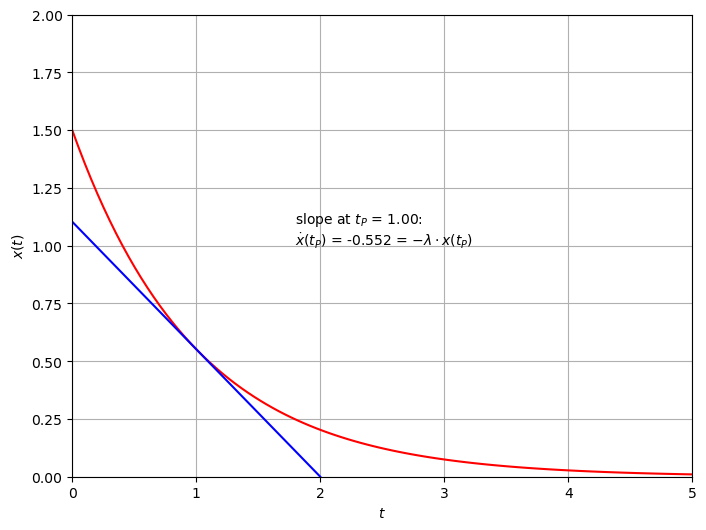

In [2]:
lam = 1 # value for lambda
ymax = 2 # set maximum for x axis
tmax = 5 # time range

x0 = 1.5 # initial value
tP = 1.0 # position of tangent

xmax = 5
ymax = 2

t = np.linspace(0, xmax, 100)
x = x0 * np.exp(-lam * t)

t_tan = np.linspace(tP-1, tP+1, 10)
xP = x0*np.exp(-lam*tP)
m = -lam*xP
q = xP-m*tP
x_tan = m*t_tan + q

plt.figure(figsize=(8,6))
plt.plot(t, x, 'r')
plt.plot(t_tan, x_tan, 'b')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.text(1.8, 1, r'slope at $t_P$ = '+
            f'{tP:.2f}: \n'+r'$\dot{x}(t_P)$ = '+
            f'{m:.3f} = '+r'$-\lambda\cdot x(t_P)$')
plt.xlim([0, xmax])
plt.ylim([0, ymax])
plt.grid(True)
plt.show()

### More Examples

Verify that the solutions fulfill the differential equations:
- The differential equation $\dot{x}(t)=k\cdot x^2(t)$ has the solution $x(t)=-\dfrac{x_0}{k\cdot x_0\cdot t-1}$ with an initial value $x(0)=x_0$.
- The differential equation $\dot{x}(t)=\dfrac{k}{x(t)}$ has the solution $x(t)=\pm \sqrt{2 k\cdot t+x_0^2)}$ with an initial value $x(0)=x_0$. The positive sign is valid for a positive initial value ($x_0>0$), the negative sign for a negative initial value ($x_0<0$).

## Linear Differential Equations

There are various types of differential equations, each type with its own strategies to find and analyse solutions. We are limiting ourselves to *ordinary differential equations* (ODEs), which only depend on a single independent variable (e.g. the time $t$). Some ODEs can be solved explicitly in terms of known functions.

A *linear differential equation* is defined as a linear combination of the unknown function and its derivatives:
$$ a_0(t)\cdot x(t)+a_1(t)\cdot \dot{x}(t)+a_2(t)\cdot \ddot{x}(t)+\cdots=0$$

A linear differential equation is called *automonous* if the coefficients $a_i(t)$ are constant, i.e. do not depend on $t$. Otherwise it is called *non-automonous*. 

Linear differential equations are widely used in physics. They describe phenomena like radioactive decay, oscillations or cooling processes. Nonlinear equations are often approximated by linear equations to find an approximate solution.

Two of the most important automonous linear differential equations are:
- exponential growth/decay: $\dot{x}(t)+\lambda x(t)=0$ 
- damped oscillation: $\ddot{x}(t)+\beta\cdot \dot{x}(t)+\omega^2\cdot x(t)=0$

## Qualitative Analysis

The qualitative behaviour of a first order ordinary differential equation can be analysed using the graph of the function $f(x)$ defining the differential equation $\dot{x}(t)=f(x(t))$. The zeros of the function correspond to *fix points* of the differential equation.

At a fix point $x^*$ the derivative is equal to zero: $\dot{x}(t)=f(x^*)=0$. It follows that $x(t)=x^*$ is a solution of the differential equation. The values of $f(x)$ near the fix point define the stability. We have to consider a small perturbation away from $x^*$, e.g. in the positive direction. If $f(x)>0$ at the new position, $x$ will increase even more and not return to $x^*$. If, on the other hand, $f(x)>0$ for $x$ slightly greater than $x^*$, the change of $x$ will be directed back to $x^*$.

Depending on the shape of $f(x)$ near a fix point $x^*$ we can classify the stability of the fix point:
- $x^*$ is a *stable* fix point if $f(x)>0$ for $x<x^*$ and $f(x)<0$ for $x>x^*$
- $x^*$ is an *unstable* fix point if $f(x)<0$ for $x<x^*$ and $f(x)>0$ for $x>x^*$
- $x^*$ is a *half-stable* fix point if $f(x)$ has the same sign for $x<x^*$ and $x>x^*$

The figure below shows the fix points for the differential equation $\dot{x(t)}=$x(t)^2-1$. The fix points are given by the equation $f(x)=x^2-1 = 0$, i.e. $x_{1, 2}^*=\pm 1$. We can easily see that $x_1^*=-1$ is a stable fix point while $x_2^*$ is unstable.

<img src='images/Fixpoints.png' width='500px'>

Close to a stable fix point the behaviour of the solution can be approximated as an exponential decay, whereas for an unstable fix point it behaves like an exponential growth close to the fix point. All solutions of a differential equation of this type either tend to infinity or end at a stable fix point – with the exception of the (not very physical) case that the starting point is at an unstable fix point and there are no perturbations.